# PERHATIAN!

Soal yang Anda kerjakan akan dinilai secara otomatis oleh sistem dari Dicoding. Oleh karena itu, Anda **tidak diperbolehkan mengubah nama fungsi yang sudah ditentukan**, karena hal tersebut dapat memengaruhi proses penilaian.

Pastikan Anda membaca dan memperhatikan setiap instruksi dengan saksama serta menuliskan kode di antara tanda komentar yang telah disediakan.

> **# MULAI KODE DI SINI**


> **# AKHIRI KODE DI SINI**

---
Selain itu, Anda **tidak diperkenankan menggunakan *library* di luar yang telah ditentukan**. Seluruh soal telah dirancang agar dapat diselesaikan dengan *library* yang tersedia.


# Algoritma Naive Bayes
Data kini memegang peran yang sangat penting dalam berbagai bidang, termasuk data science dan machine learning. Data dapat dimanfaatkan tidak hanya untuk menghasilkan wawasan dan mendukung pengambilan keputusan berbasis fakta, tetapi juga untuk mengembangkan produk-produk inovatif yang berdampak nyata.


Dalam permasalahan kali ini, Anda akan bekerja dengan data yang menerapkan prinsip-prinsip probabilitas dan statistika dengan menyelesaikan permasalahan sederhana, yakni memprediksi jenis/ras burung menggunakan algoritma Naive Bayes.

Anda akan membuat data sintetis untuk jenis-jenis burung tersebut dengan mengikuti prinsip-prinsip probabilitas sehingga pada permasalahan kali ini akan dibagi dalam dua segmen.

## Segmen:
1. **Menghasilkan Data Acak**: Belajar menghasilkan data acak yang mengikuti distribusi tertentu.
2. **Klasifikasi Naive Bayes**: Mengimplementasikan klasifikasi Naive Bayes dari data yang dihasilkan pada segmen 1.

Jangan khawatir! Anda akan diberikan panduan untuk mengerjakan submission ini.


In [3]:
# TIDAK DIPERBOLEHKAN MENGGUNAKAN LIBRARY LAIN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import uniform, binom, norm
from scipy.special import erfinv
from dataclasses import dataclass

# Segmen 1: Menghasilkan Data Acak
Mari rekap beberapa konsep serta materi yang telah Anda pelajari selama belajar di kelas Matematika untuk Data Science.

Dalam dunia data science, Anda akan sering berhadapan dengan konsep populasi dan sampel. Populasi dan sampel tidak hanya merujuk pada entitas atau kumpulan individu, tetapi juga dapat menggambarkan kumpulan kejadian atau fenomena tertentu.

Saat menjumpai kasus yang berhubungan dengan suatu event/kejadian, Anda tidak hanya ingin tahu "berapa peluang sebuah kejadian terjadi", tetapi juga ingin melihat keseluruhan pola distribusi dari nilai-nilai yang mungkin.

Dalam melihat pola tersebut, Anda bisa menggunakan fungsi distribusi yang berperan untuk memahami probabilitas tersebar dalam ruang kemungkinan.

Anda sudah mempelajari tiga jenis fungsi distribusi yang umum dipakai, yakni
- **Probability Mass Function (PMF)**: Digunakan untuk mencari distribusi terhadap variabel diskrit.
- **Probability Density Function (PDF)**: Digunakan untuk mencari distribusi terhadap nilai kontinu.
- **Cummulative Distribution Function (CDF)**: Digunakan untuk melihat total peluang yang sudah terkumpul sampai suatu nilai tertentu, bisa digunakan untuk variabel diskret dan kontinu


Dalam segmen pertama, Anda akan diajak untuk menghasilkan data acak berdasarkan ketiga jenis distribusi tersebut.



## Variabel Acak

Sebuah variabel acak (dinotasikan sebagai $X$) adalah fungsi yang mewakili fenomena acak, artinya nilai yang dihasilkan tidak bisa dipastikan tepat, tetapi memberikan peluang untuk berbagai nilai yang bisa diambil.

Contohnya, jika $X$ adalah variabel acak kontinu dengan distribusi uniform [2,4], kita tidak bisa menentukan nilai pasti $X$, tetapi kita bisa mengatakan bahwa nilai $X$ berada pada rentang 2 sampai 4.

> Perlu diingat: Variabel acak kontinu, mencari peluang tepat pada angka tertentu (misalnya angka 3) hampir tidak mungkin dan bisa dikatakan nol. Hal ini disebabkan, saat Anda mencari angka 3 pada rentang 2 sampai 4. Anda bisa mendapatkan angka 2.1, 2.001, atau bahkan 2.000000001. Jumlah nilai yang mungkin tidak terhitung (tak terhingga). Oleh karena itu, peluang variabel acak kontinu pada satu titik tunggal = 0. Peluang yang bermakna adalah peluang dalam suatu invterval.

Konsep di atas adalah yang disebut sebagai **probability density function** (PDF) yang secara matematis memiliki rumus berikut.
$$
P(a \leq X \leq b) = \int_a^b f(x) \, dx
$$

Artinya, peluang $X$ berada dalam rentang [a,b] dihitung sebagai luas di bawah kurva $f(x)$ antara $a$ dan $b$.

Pada variabel acak diskret, kita mengenal **probability mass function** (PMF), yaitu fungsi yang menunjukkan probabilitas untuk setiap nilai yang mungkin diambil oleh variabel diskret.

$$
P(X = x) = p_x
$$

Berbeda dengan variabel acak kontinu yang memiliki jumlah nilai tak terhingga dalam rentang tertentu (sehingga peluang tepat di satu nilai adalah nol), variabel acak diskret hanya memiliki sejumlah nilai yang terhitung sehingga bisa memberikan peluang positif pada setiap nilai tersebut.

Contohnya adalah kasus pelemparan dadu. Saat melempar sebuah dadu bersisi enam, peluang munculnya setiap angka (1 hingga 6) sama, yaitu 1/6.

$$
P(X = k) = \frac{1}{6}, \quad k = 1, 2, 3, 4, 5, 6.
$$

Fungsi lain yang terkait dengan variabel acak adalah **cummulative distribution function** (CDF) yang dinotasikan dengan $F$. Ini mewakili peluang bahwa variabel acak $X$ kurang dari atau sama dengan x, untuk setiap x dalam bilangan riil.

Artinya, jika Anda memiliki angka x, $F(x)$ memberi tahu Anda **seberapa besar peluang semua nilai di bawah atau sama dengan x.**

Contohnya dalam kasus pelemparan dadu, dalam PMF kita mengetahui bahwa peluang mendapatkan angka 1 sampai 6 adalah sama.
- $P(X = 1) = 1/6$
- $P(X = 2) = 1/6$
- $P(X = 3) = 1/6$
- $ ... $

CDF-nya memberikan informasi semua peluang sampai titik yang diinginkan (misalnya 6).
- $P(X ≤ 1) = 1/6$
- $P(X ≤ 2) = 1/6 + 1/6 = 2/6$
- $P(X ≤ 3) = 3/6$
- $ ... $
- $P(X ≤ 6) = 6/6$

> Materi PDF, CMF, dan PDF dapat diakses dalam materi distribusi probabilitas pada modul ketiga.

Ada hal menarik yang harus Anda pahami, kita bisa menghasilkan data buatan dengan distribusi yang kita inginkan, jika kita tahu cummulative distribution function-nya ($F$).

Hal ini disebabkan karena jika $X$ adalah variabel acak dengan CDF F, $F(X)$ mengikuti distribusi uniform di antara 0 dan 1. Dengan kata lain, variabel acak baru $F(X)$ akan terdistribusi uniform antara 0 dan 1. Ini membuka kemungkinan menghasilkan data buatan dengan distribusi yang kita inginkan, jika kita tahu F.

Proses untuk mencapai hal tersebut adalah berikut.
1. Hasilkan nilai acak $y$ yang terdistribusi uniform dari interval [0,1]
2. Hitung $F^{-1}(y)$, yaitu fungsi inverse dari F yang dievaluasi pada y.

Dapat dibuktikan bahwa jika $Y$ mengikuti distribusi uniform antara 0 dan 1, variabel acak $F^{-1}(y)$ memiliki distribusi yang sama dengan $X$. Dengan begitu, mengitung invers dari F bisa menghasilkan data buatan dari distribusi mana pun yang diketahui.

Pada materi di kelas, Anda sudah mengenal banyak jenis distribusi probabilitas. Kali ini, kita akan coba menghasilkan angka acak mengikuti tiga jenis distribusi probabilitas berikut.

*   Uniform Distribution
*   Binomial Distribution
*   Gaussian Distribution

Mari kita mulai dengan menulis kode untuk membuat nilai acak untuk masing-masing distribusi di atas.

> Pro Tips: Mengapa kita perlu mengetahui variabel acak dalam statistik? Dalam dunia data science, setiap dataset yang Anda olah adalah sebuah variabel acak. Penting untuk memahami jenis dataset yang Anda miliki untuk bisa mengetahui distribusi dan karakteristiknya.


### Tugas 1: Membuat Data Distribusi Uniform.

Distribusi uniform adalah distribusi peluang ketika semua nilai dalam rentang tertentu sama-sama mungkin terjadi. Dengan asumsi $a ≤ x ≤ b$, distribusi uniform memiliki rumus sebagai berikut.

$$
P(X=x) = 1/(b-a)
$$

Dengan variabel yang diketahui
- $x$: angka yang ingin dihitung.
- $b$: batas atas rentang yang diketahui.
- $a$: batas bawah rentang yang diketahui.

#### Tugas 1.1: Membuat Fungsi untuk Menghasilkan Angka Acak Uniform


Sekarang, mari buat sebuah fungsi yang bertujuan untuk membuat angka acak yang mengikuti distribusi uniform.

> Tips: Anda dapat melihat referensi fungsi dari [numpy.random](https://numpy.org/doc/2.2/reference/random/index.html) untuk menghasilkan data random berbentuk uniform.

**INGAT! TIDAK DIPERKENANKAN** untuk mengubah nama fungsi yang sudah didefinisikan.

In [4]:
def generate_rand_uniform(lower_bound:float, upper_bound:float, num_samples:int):
  """
  Fungsi ini ditujukan untuk menghasilkan array bilangan acak yang terdistribusi uniform dalam rentang yang ditentukan.

  Parameters:
  - upper_bound (float): Batas bawah rentang
  - lower_bound (float): Batas atas rentang
  - num_samples (int): Jumlah sampel yang dihasilkan

  Return:
  - array (ndarray): Array bilangan acak yang terdistribusi uniform pada rentang [a,b)

  """
  np.random.seed(15) #JANGAN UBAH KODE INI

  # MULAI KODE DI SINI
  # Anda wajib menggunakan numpy.random.uniform (dari numpy) untuk menjaga konsistensi output.
  array = np.random.uniform(lower_bound, upper_bound, num_samples)
  # AKHIRI KODE DI SINI

  return array

In [5]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

print(f"7 nilai acak yang diambil dari interval 0 sampai 1:\n {np.array2string(generate_rand_uniform(0,1, num_samples=7), precision=3)}\n")
print(f"12 nilai acak yang diambil dari interval 20 sampai 70:\n {np.array2string(generate_rand_uniform(20,70, num_samples=12), precision=3)}\n")
print(f"2 nilai acak yang diambil dari interval 10 sampai 99:\n {np.array2string(generate_rand_uniform(10,99, num_samples=2), precision=3)}\n")

7 nilai acak yang diambil dari interval 0 sampai 1:
 [0.849 0.179 0.054 0.362 0.275 0.53  0.306]

12 nilai acak yang diambil dari interval 20 sampai 70:
 [62.441 28.945 22.718 38.077 33.77  46.5   35.296 35.224 25.587 32.495
 65.881 33.207]

2 nilai acak yang diambil dari interval 10 sampai 99:
 [85.545 25.922]



##### Output yang diharapkan

```
7 nilai acak yang diambil dari interval 0 sampai 1:
 [0.849 0.179 0.054 0.362 0.275 0.53  0.306]

12 nilai acak yang diambil dari interval 20 sampai 70:
 [62.441 28.945 22.718 38.077 33.77  46.5   35.296 35.224 25.587 32.495
 65.881 33.207]

2 nilai acak yang diambil dari interval 10 sampai 99:
 [85.545 25.922]
```

#### Tugas 1.2: Membuat Visualisasi Distribusi Uniform

Hebat! Fungsi untuk menghasilkan data acak dengan bentuk distribusi uniform telah berhasil dibuat!

Sekarang, kita akan melihat visualisasi dari data yang dihasilkan berdasarkan distribusi uniform tersebut. Anda hanya perlu fokus pada dua tugas yang sudah didefinisikan dalam fungsi.


**Catatan:**

Fungsi ini tidak akan masuk dalam pengujian, silakan untuk berkreasi hingga memenuhi ekspektasi yang diharapkan.

In [6]:
def viz_uniform_teoretis(lower_bound, upper_bound, num_samples):
  """
  Menghasilkan visualisasi distribusi uniform.

  Parameters:
  - upper_bound (float): Batas bawah rentang
  - lower_bound (float): Batas atas rentang
  - num_samples (int): Jumlah sampel yang dihasilkan
  """

  # Mengatur ukuran plot
  plt.figure(figsize=(8,5))

  # MULAI KODE DI SINI

  # Tugas 1: Gunakan fungsi generate_rand_uniform dengan parameter yang sama
  # dengan fungsi visualisasi ini, simpan hasilnya ke dalam sebuah variabel.
  data = generate_rand_uniform(lower_bound, upper_bound, num_samples)


  # Tugas 2: Buatlah sebuah histogram dari variabel sebelumnya dengan parameter-parameternya sebagai berikut.
  # - Total bins adalah 30.
  # - Mengaktifkan probability density
  # - Menggunakan warna lightgrey
  # - Menggunakan edgecolor hitam
  plt.hist(data, bins=30, density=True, color='lightgrey', edgecolor='black')


  # AKHIRI KODE DI SINI

  x = np.linspace(lower_bound - 2, upper_bound + 2, 500)
  pdf = uniform.pdf(x, loc=lower_bound, scale=upper_bound - lower_bound)
  plt.plot(x, pdf, color='blue')
  plt.fill_between(x, pdf, 0, where=(x >= lower_bound) & (x <= upper_bound), color='skyblue', alpha=0.3)

  plt.axvline(lower_bound, color='grey', linestyle='--', label=f"Batas Bawah (lower_bound={lower_bound})")
  plt.axvline(upper_bound, color='grey', linestyle='--', label=f"Batas Atas (upper_bound={upper_bound})")

  plt.title("Distribusi Uniform")
  plt.legend()
  plt.savefig("uniform-viz.png")
  plt.show()

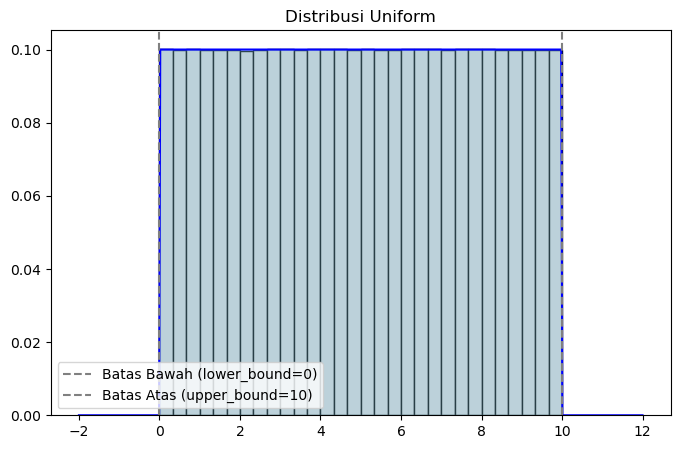

In [7]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.
# JANGAN mengubah kode di bawah ini.
viz_uniform_teoretis(lower_bound=0, upper_bound=10, num_samples=10000000)


# Pro Tips:
# Dalam statistik, semakin banyak jumlah sampel, hasilnya akan semakin baik dan mendekati karakteristik populasi sebenarnya.
# Anda dapat mencobanya dengan mengubah jumlah sampel menjadi lebih sedikit
# daripada contoh di atas. Semakin kecil jumlah sampel, distribusi pada histogram
# akan terlihat lebih acak dan tidak merata. Sebaliknya, semakin besar jumlah sampel,
# bentuk histogram akan semakin mendekati distribusi uniform yang diharapkan.

# Gunakan ini untuk melihat visualisasi lainnya
# viz_uniform_teoretis(lower_bound=0, upper_bound=10, num_samples=100000)
# viz_uniform_teoretis(lower_bound=0, upper_bound=10, num_samples=100)

##### Output yang diharapkan

<img src="https://drive.google.com/uc?id=1cVxtTj2c9iOEszz3pxCDHaC-s7IbG0Jj" style="height:300px;"/>

### Tugas 2: Membuat Data Distribusi Gaussian

Sekarang Anda telah memiliki sebuah fungsi yang dapat menghasilkan data acak dengan distribusi uniform. Sebagaimana yang dijelaskan sebelumnya, kita dapat membentuk variabel dengan distribusi tertentu jika memiliki angka-angka yang berdistribusi uniform.

Mari kita buat variabel-variabel acak yang mengikuti distribusi Gaussian dengan masuk ke tahap berikutnya, yaitu menghitung inverse CDF $F^{-1}(y)$.

#### Tugas 2.1: Distribusi Gaussian - Inverse CDF

Distribusi Gaussian juga dikenal sebagai distribusi normal. Distribusi ini menggambarkan pola penyebaran data dari begitu banyak fenomena. Sayangnya, tidak ada bentuk rumus tertutup (closed-form) untuk fungsi CDF dari distribusi normal.

Dalam distribusi Gaussian, perhitungannya melibatkan fungsi yang disebut Gaussian Error Function, yang dinotasikan sebagai $erf(x)$. Kita dapat membuat fungsi inverse CDF untuk distribusi normal dengan memanfaatkan error function tersebut.

Namun, implementasi proses ini cukup rumit jika dilakukan secara manual (dan di luar jangkauan pembelajaran kelas). Untuk itu, Anda dapat memanfaatkan pustaka Python, seperti `scipy.special.erf`, `scipy.special.erfinv`, atau `math.erf` untuk mengimplementasikannya dengan lebih mudah.

Jika sebuah variabel acak mengikuti distribusi normal $X \sim N(\mu, \sigma)$, CDF dapat diekspresikan sebagai berikut.

$$y = F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma \sqrt{2}} \right) \right]$$

Namun, jika kita mengambil invers dari fungsi erf, rumusnya dapat dituliskan sebagai berikut.

$$x = F^{-1}(y) = \sigma \sqrt{2} \cdot \text{erf}^{-1}(2y - 1) + \mu
$$


> Catatan:
- Miu (μ): Nilai rata-rata dari distribusi normal/Gaussian.
- Sigma (σ): Nilai Standar Deviasi dari distribusi normal/Gaussian.
- $F$: Cummulative Distribution Function (CDF).

> Tips:
- Gunakan rumus di atas untuk fungsi uniform_inverse_cdf


In [8]:
def uniform_inverse_cdf(probability, miu, sigma):
  """
  Menghitung inverse cummulative distribution function (CDF) dari distribusi Gaussian.

  Parameters:
  - probability (float atau ndarray): Probabilitas atau array dari probabilitas.
  - miu (float): Rata-rata dari distribusi Gaussian.
  - sigma (float): Standar deviasi dari distribusi Gaussian.

  Return:
  - x (float atau ndarray): Nilai inverse CDF dari distribusi Gaussian berdasarkan probabilitas yang diberikan.
  """

  # MULAI KODE DI SINI
  x = miu + sigma * np.sqrt(2) * erfinv(2 * probability - 1)
  # AKHIRI KODE DI SINI

  return x

In [9]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

print(f"Inverse CDF dari distribusi Gaussian dengan miu {15} dan sigma {5} dengan angka {1e-7}: {uniform_inverse_cdf(1e-7, 15, 5):.3f}")
print(f"Inverse CDF dari distribusi Gaussian dengan miu {15} dan sigma {5} dengan angka {1}: {uniform_inverse_cdf(1, 15, 5):.3f}")

Inverse CDF dari distribusi Gaussian dengan miu 15 dan sigma 5 dengan angka 1e-07: -10.997
Inverse CDF dari distribusi Gaussian dengan miu 15 dan sigma 5 dengan angka 1: inf


##### Output yang diharapkan

```
Inverse CDF dari distribusi Gaussian dengan miu 15 dan sigma 5 dengan angka 1e-07: -10.997
Inverse CDF dari distribusi Gaussian dengan miu 15 dan sigma 5 dengan angka 1: inf
```

#### Tugas 2.2: Menghasilkan Gaussian Distribution

Keren! Anda sudah memiliki fungsi yang bisa menghitung inverse CDF untuk distribusi Gaussian. Selanjutnya, mari kita gabungkan dua fungsi yang sudah dibuat tersebut untuk membuat data acak dengan distribusi Gaussian.

In [10]:
def generate_gaussian(miu, sigma, num_samples):
  """
  Menghasilkan data dengan distribusi Gaussian/Normal.

  Parameters:
  - miu (float): Rata-rata dari distribusi Gaussian.
  - sigma (float): Standar deviasi dari distribusi Gaussian.
  - num_samples (int): Jumlah sampel yang dihasilkan.

  Returns:
  - array (ndarray): Array dari probabilitas distribusi Gaussian.
  """

  # MULAI KODE DI SINI

  # Petunjuk:
  # - Gunakan fungsi generate_rand_uniform untuk menghasilkan data acak uniform dengan rentang 0 dan 1.
  array = miu + sigma * np.sqrt(2) * erfinv(2 * generate_rand_uniform(0, 1, num_samples) - 1)

  # Petunjuk:
  # - Gunakan fungsi uniform_inverse_cdf untuk melakukan inverse CDF dari data acak yang dihasilkan pada fungsi sebelumnya.

  # AKHIRI KODE DI SINI

  return array

In [11]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

first_gaussian = generate_gaussian(0,1,1000)
second_gaussian = generate_gaussian(12,6,1000)
third_gaussian = generate_gaussian(10,5,1000)

print(f"3 angka pertama untuk variabel first_gaussian: {first_gaussian[:3]}")
print(f"3 angka pertama untuk variabel second_gaussian: {second_gaussian[:3]}")
print(f"3 angka pertama untuk variabel third_gaussian: {third_gaussian[:3]}")

3 angka pertama untuk variabel first_gaussian: [ 1.03137584 -0.91958083 -1.60394386]
3 angka pertama untuk variabel second_gaussian: [18.18825505  6.48251504  2.37633686]
3 angka pertama untuk variabel third_gaussian: [15.15687921  5.40209587  1.98028072]


##### Output yang diharapkan

```
3 angka pertama untuk variabel first_gaussian: [ 1.03137584 -0.91958083 -1.60394386]
3 angka pertama untuk variabel second_gaussian: [18.18825505  6.48251504  2.37633686]
3 angka pertama untuk variabel third_gaussian: [15.15687921  5.40209587  1.98028072]
```

#### Tugas 2.3: Membuat Visualisasi Distribusi Gaussian

Mantap! Angka distribusi Gaussian telah berhasil didapatkan!

Selanjutnya, Anda perlu membuat kembali visualisasi yang ditujukan untuk menghasilkan distribusi Gaussian.

**Catatan:**

Fungsi ini tidak akan masuk dalam pengujian, silakan untuk berkreasi hingga memenuhi ekspektasi yang diharapkan.

In [12]:
def viz_distribusi_gaussian(first_gaussian, second_gaussian, third_gaussian):
  """
  Menghasilkan histogram plot untuk tiga distribusi Gaussian yang dihasilkan pada pengujian.

  Parameters:
  - first_gaussian (ndarray): array dari distribusi Gaussian pertama.
  - second_gaussian (ndarray): array dari distribusi Gaussian kedua.
  - third_gaussian (ndarray): array dari distribusi Gaussian ketiga.
  """
  fig, ax = plt.subplots(1, 1, figsize=(10, 4))

  # MULAI KODE DI SINI

  # Tugas:
  # Buatlah tiga buah histogram plot yang diambil dari variabel first_gaussian, second_gaussian, dan third_gaussian dengan menggunakan parameter-parameter berikut.
  # - alpha=0.5,
  # - Jumlah bins adalah 32.
  # - Menggunakan label sesuai jenis distribusi Gaussian-nya.
  ax.hist(first_gaussian, bins=32, alpha=0.5, label='Gaussian (miu=0, sigma=1)')
  ax.hist(second_gaussian, bins=32, alpha=0.5, label='Gaussian (miu=12, sigma=6)')
  ax.hist(third_gaussian, bins=32, alpha=0.5, label='Gaussian (miu=10, sigma=5)')

  # AKHIRI KODE DI SINI

  ax.set_title("Histograms of Gaussian distributions")
  ax.set_xlabel("Values")
  ax.set_ylabel("Frequencies")
  ax.legend()
  plt.savefig("gaussian-viz.png")
  plt.show()

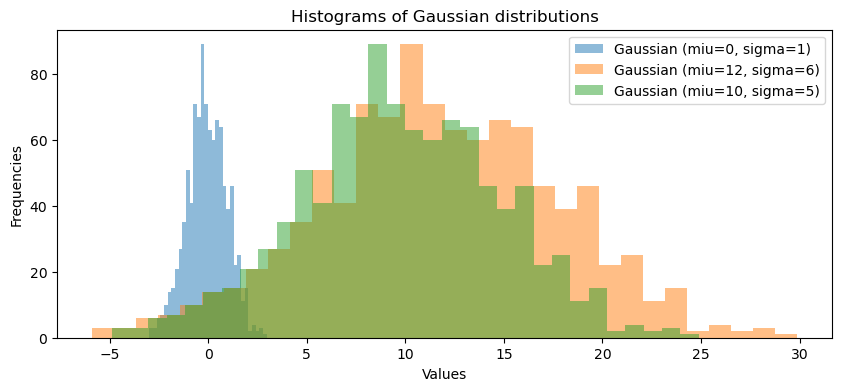

In [13]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

viz_distribusi_gaussian(first_gaussian, second_gaussian, third_gaussian)

##### Output yang diharapkan

<img src="https://drive.google.com/uc?id=1jj6RZ6AMkQvHnQM3hJ82X6ZAdJv5RPfz" style="height:300px;"/>

### Tugas 3: Membuat Data Binomial Distribution

Selanjutnya, kita akan membuat data yang mengikuti distribusi binomial. Binomial adalah jenis distribusi untuk variabel acak diskret yang menghitung jumlah keberhasilan (success) dalam sejumlah percobaan yang sudah ditetapkan.

Ada beberapa sifat utama dalam distribusi binomial, yakni berikut.
- Jumlah percobaan tetap (n).
- Percobaan saling independen, artinya setiap percobaan tidak memengaruhi percobaan lain.
- Peluang sukses tetap (p) setiap percobaan.
  - Contohnya, saat Anda mencoba melempar koin, peluang keluar kepala (head) selalu 0.5 setiap kali dilempar.
- Hanya dua hasil pada setiap percobaan, yakni berhasil atau gagal.

#### Tugas 3.1: Distribusi Binomial - Inverse CDF

Jika suatu variabel acak $X$ mengikuti bentuk $Binomial(n,p)$, rumus PDF nya adalah sebagai berikut.

$$P(X = k) = {n \choose k}p^{k}(1-p)^{n-k}.$$

Oleh sebab itu, jika $0 \leq x \leq n$, rumus CDF-nya sebagai berikut.

$$F(x) = P(X \leq x) = P(X = 0) + P(X = 1) + \ldots + P(X = \lfloor x \rfloor) = \sum_{k=0}^{\lfloor x \rfloor} {n \choose k}p^{k}(1-p)^{n-k}$$

Dalam rumus tersebut, notasi $\lfloor x \rfloor$ melambangkan floor function yang mengembalikan bilangan bulat terbesar yang kurang dari atau sama dengan x. Misalnya, $\lfloor 4.7 \rfloor = 4$.

Fungsi ini diperlukan karena domain $F$ adalah bilangan riil, tetapi $P(X = k)$ hanya tidak nol untuk nilai-nilai bilangan bulat positif. Selain itu, jika $x > n$, maka $F(x) = 1$.

Sama seperti Gaussian, binomial pun tidak memiliki bentuk tertutup (closed-form) untuk fungsi inverse CDF $F$ untuk kasus ini. Anda dapat memanfaatkan library `scipy.stats.binom` yang mengimplementasikan inverse CDF menggunakan **generalized quantile functions**.

> Tips: Anda dapat menggunakan method .ppf dalam scipy.stats.binom untuk mengimplementasikan rumus inverse CDF

In [14]:
from scipy.stats import binom

def binomial_inverse_cdf(probability, n_trials, success_prob):
  """
  Menghitung inverse CDF dari distribusi Binomial.

  Parameters:
  - probability (float atau ndarray): Probabilitas atau array dari probabilitas.
  - n_trials (int): Banyaknya percobaan yang dilakukan.
  - success_prob (float): Jumlah percobaan yang berhasil.

  Returns:
  - array (float atau ndarray): Nilai inverse CDF untuk distribusi Binomial berdasarkan probabilitas yang diberikan.
  """

  # MULAI KODE DI SINI
  array = binom.ppf(probability, n_trials, success_prob)
  # AKHIRI KODE DI SINI

  return array

In [15]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

print(f"Inverse CDF dari distribusi Binomial dengan probability {1e-5}, n_trials {15}, dan success_prob {0.9}: {binomial_inverse_cdf(1e-5, 15, 0.9): .3f}")
print(f"Inverse CDF dari distribusi Binomial dengan probability {0}, n_trials {5}, dan success_prob {0.1}: {binomial_inverse_cdf(0, 5, 0.1): .3f}")
print(f"Inverse CDF dari distribusi Binomial dengan probability {0.3}, n_trials {22}, dan success_prob {0.5}: {binomial_inverse_cdf(0.3, 22, 0.5): .3f}")

Inverse CDF dari distribusi Binomial dengan probability 1e-05, n_trials 15, dan success_prob 0.9:  7.000
Inverse CDF dari distribusi Binomial dengan probability 0, n_trials 5, dan success_prob 0.1: -1.000
Inverse CDF dari distribusi Binomial dengan probability 0.3, n_trials 22, dan success_prob 0.5:  10.000


##### Output yang diharapkan

```
Inverse CDF dari distribusi Binomial dengan probability 1e-05, n_trials 15, dan success_prob 0.9:  7.000
Inverse CDF dari distribusi Binomial dengan probability 0, n_trials 5, dan success_prob 0.1: -1.000
Inverse CDF dari distribusi Binomial dengan probability 0.3, n_trials 22, dan success_prob 0.5:  10.000
```

#### Tugas 3.2: Menghasilkan Binomial Distribution

Mantap! Anda sudah membuat fungsi yang menghasilkan inverse CDF untuk distribusi binomial.

Sekarang, mari buat fungsi yang membuat data acak dengan distribusi binomial.

In [16]:
def generate_binomial(n_trials, success_prob, num_samples):
  """
  Menghasilkan sebuah array dari angka acak dengan distribusi binomial.

  Parameters:
  - n_trials (int): Banyaknya percobaan yang dilakukan untuk distribusi binomial.
  - success_prob (float): Banyaknya percobaan yang berhasil.
  - num_samples(int): Banyaknya sampel yang akan dihasilkan.

  Returns:
  - array (ndarray): Sebuah array yang berisi angka acak dengan distribusi Binomial
  """

  # MULAI KODE DI SINI

  # Petunjuk:
  # - Gunakan fungsi generate_rand_uniform untuk menghasilkan data acak uniform dengan rentang 0 dan 1.
  array = binom.ppf(generate_rand_uniform(0, 1, num_samples), n_trials, success_prob)
  # Petunjuk:
  # - Gunakan fungsi binom_inverse_cdf untuk melakukan inverse CDF dari data acak yang dihasilkan pada fungsi sebelumnya.

  # AKHIRI KODE DI SINI

  return array

In [17]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

first_binomial = generate_binomial(12, 0.4, 1000)
second_binomial = generate_binomial(15, 0.5, 1000)
third_binomial = generate_binomial(25, 0.8, 1000)

print(f"3 angka pertama untuk variabel first_binomial: {first_binomial[:3]}")
print(f"3 angka pertama untuk variabel second_binomial: {second_binomial[:3]}")
print(f"3 angka pertama untuk variabel third_binomial: {third_gaussian[:3]}")

3 angka pertama untuk variabel first_binomial: [7. 3. 2.]
3 angka pertama untuk variabel second_binomial: [9. 6. 4.]
3 angka pertama untuk variabel third_binomial: [15.15687921  5.40209587  1.98028072]


##### Output yang diharapkan

```
3 angka pertama untuk variabel first_binomial: [7. 3. 2.]
3 angka pertama untuk variabel second_binomial: [9. 6. 4.]
3 angka pertama untuk variabel third_binomial: [15.15687921  5.40209587  1.98028072]
```

#### Tugas 3.3: Membuat Visualisasi Ditribusi Binomial.

*Marvelous!* Anda sudah membuat fungsi untuk menghasilkan angka acak distribusi binomial. Lanjut, mari kita buat visualisasinya.

**Catatan:**

Fungsi ini tidak akan masuk dalam pengujian, silakan untuk berkreasi hingga memenuhi ekspektasi yang diharapkan.

In [18]:
def viz_distribusi_binomial(first_binomial, second_binomial, third_binomial):
  """
  Menghasilkan histogram plot untuk tiga distribusi binomial yang dihasilkan pada pengujian.

  Parameters:
  - first_binomial (ndarray): array dari distribusi binomial pertama.
  - second_binomial (ndarray): array dari distribusi binomial kedua.
  - third_binomial (ndarray): array dari distribusi binomial ketiga.
  """

  fig, ax = plt.subplots(1, 1, figsize=(10, 4))

  # MULAI KODE DI SINI
  # Tugas:
  # Buatlah tiga buah histogram plot yang diambil dari variabel first_binomial,
  # second_binomial, dan third_binomial dengan menggunakan parameter-parameter berikut.
  # - alpha=0.5,
  # - Menggunakan label sesuai dengan jenis distribusi Gaussian-nya.
  ax.hist(first_binomial, bins=32, alpha=0.5, label='Binomial (n_trials=12, success_prob=0.4)')
  ax.hist(second_binomial, bins=32, alpha=0.5, label='Binomial (n_trials=15, success_prob=0.5)')
  ax.hist(third_binomial, bins=32, alpha=0.5, label='Binomial (n_trials=25, success_prob=0.8)')
  
  # AKHIRI KODE DI SINI

  ax.set_title("Histograms of Binomial distributions")
  ax.set_xlabel("Values")
  ax.set_ylabel("Frequencies")
  ax.legend()
  plt.savefig("binomial.png")
  plt.savefig("binomial-viz.png")
  plt.show()

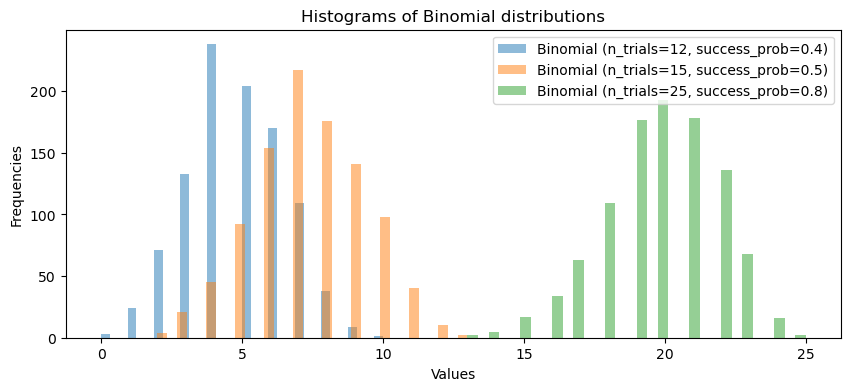

In [19]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

viz_distribusi_binomial(first_binomial, second_binomial, third_binomial)

##### Output yang diharapkan

<img src="https://drive.google.com/uc?id=1Vq88KSfdkbjT_R0PaChjZwHnSxVHcMdI" style="height:300px;"/>

# Segmen 2: Implementasi Algoritma Naive Bayes dengan Data Sintetis

Selamat! Anda telah mempelajari dasar-dasar distribusi probabilitas pada segmen pertama. Kali ini, Anda akan diajak untuk mengintegrasikan teori distribusi probabilitas dengan algoritma Naive Bayes.

Segmen ini akan berfokus pada dua hal:

* Membuat data sintetis yang mengikuti distribusi tertentu.

* Melakukan klasifikasi Naive Bayes terhadap data sintetis yang telah dibuat.

Pada tahap klasifikasi, Naive Bayes akan digunakan untuk mengklasifikasikan **jenis burung** berdasarkan karakteristiknya.

## Segmen 2.1: Membuat Data Sintetis

Pada tahap ini, Anda akan membuat dataset sintetis yang merepresentasikan jenis burung berdasarkan empat karakteristik atau atribut berikut:

* **wingspan_cm**: Ukuran bentang sayap burung dalam sentimeter, mengikuti distribusi Gaussian.
* **weight_g**: Berat burung dalam gram, mengikuti distribusi Gaussian.
* **sing_days**: Jumlah hari burung berkicau dalam sebulan (dengan asumsi satu bulan = 30 hari), mengikuti distribusi binomial.
* **beak_head_ratio**: Rasio panjang paruh hingga kepala burung, mengikuti distribusi uniform.

Karena sebelumnya sudah membuat fungsi untuk menghasilkan berbagai distribusi tersebut, Anda akan memanfaatkannya pada tahap ini.

In [20]:
# Mendefinisikan nama-nama kolom/fitur dataset
FEATURES = ["wingspan_cm", "weight_g", "sing_days", "beak_head_ratio"]

Selanjutnya, Anda perlu menyimpan parameter distribusi untuk setiap fiturnya. Misalnya, fitur `weight_g` memiliki distribusi Gaussian dan parameter miu dan sigma.

Agar meminimalkan kompleksitas kode, kita akan menggunakan [dataclass](https://docs.python.org/3/library/dataclasses.html) pada setiap parameter untuk meminimalkan kompleksitas kode.

Jangan khawatir jika Anda belum familier dengan fungsi ini. dataclass adalah decorator pada Python (dikenalkan sejak Python 3.7) yang secara otomatis menambahkan *boilerplate code* dalam sebuah class untuk menyimpan data.

Contohnya, Anda memiliki class berikut.

```
@dataclass
class my_course:
  course_id: int
  course_name: string

foo = my_course(course_name='Dicoding')
```

Anda dapat mengakses informasi `course_name` dari `foo` melalui sintaks `foo.course_name` yang akan mengembalikan string "Dicoding".


> Mengapa menggunakan dataclass? Anda perlu menyimpan parameter distribusi untuk setiap fitur. Misalnya, untuk weight dan height, diperlukan parameter μ dan σ. Jika dibuat terpisah, seperti miu_weight. sigma_weight, miu_height, sigma_height, akan tidak efektif karena terlalu panjang dan beragam.

__repr__ adalah method yang digunakan untuk menampilkan objek saat Anda print.

Tanpa `__repr__`:
```
<my_class object at 0x7f9f3b4d>
```

Dengan `__repr__`:
```
my_class(a='Dicoding')
```

In [21]:
# Mendefinisikan parameter distribusi dalam class.

@dataclass
class gaussian_params:
  miu: float
  sigma: float

  def __repr__(self):
    return f"gaussian_params(mu={self.miu:.3f}, sigma={self.sigma:.3f})"

@dataclass
class binomial_params:
  n_trials: int
  probability: float

  def __repr__(self):
    return f"binomial_params(n_trials={self.n_trials:.3f}, probability={self.probability:.3f})"

@dataclass
class uniform_params:
  lower_bound: int
  upper_bound: int

  def __repr__(self):
    return f"uniform_params(lower_bound={self.lower_bound:.3f}, upper_bound={self.upper_bound:.3f})"

Setelah mendefinisikan *class* untuk menyimpan parameter distribusi, sekarang kita perlu membuat sebuah dictionary bernama `breed_params` yang berisi semua informasi distribusi untuk masing-masing jenis burung.

Dalam dictionary ini, setiap key mewakili satu jenis burung (dengan label numerik 0,1, dan 2) dan setiap value berisi parameter distribusi untuk semua atribut fitur (seperti wingspan, weight, sing_days, dan beak_head_ratio).

Nantinya, dictionary ini digunakan untuk menghasilkan data sintetis berdasarkan jenis distribusi dan parameter yang sudah ditetapkan.

In [22]:
breed_params  = {
    0: {
        "wingspan_cm": gaussian_params(miu=35, sigma=1.5),
        "weight_g": gaussian_params(miu=20, sigma=1),
        "sing_days": binomial_params(n_trials=30, probability=0.8),
        "beak_head_ratio": uniform_params(lower_bound=0.6, upper_bound=0.1)
    },
    1: {
        "wingspan_cm": gaussian_params(miu=30, sigma=2),
        "weight_g": gaussian_params(miu=25, sigma=5),
        "sing_days": binomial_params(n_trials=30, probability=0.5),
        "beak_head_ratio": uniform_params(lower_bound=0.2, upper_bound=0.5)
    },
    2: {
        "wingspan_cm": gaussian_params(miu=40, sigma=3.5),
        "weight_g": gaussian_params(miu=32, sigma=3),
        "sing_days": binomial_params(n_trials=30, probability=0.3),
        "beak_head_ratio": uniform_params(lower_bound=0.1, upper_bound=0.3)
    }
}

breed_params

{0: {'wingspan_cm': gaussian_params(mu=35.000, sigma=1.500),
  'weight_g': gaussian_params(mu=20.000, sigma=1.000),
  'sing_days': binomial_params(n_trials=30.000, probability=0.800),
  'beak_head_ratio': uniform_params(lower_bound=0.600, upper_bound=0.100)},
 1: {'wingspan_cm': gaussian_params(mu=30.000, sigma=2.000),
  'weight_g': gaussian_params(mu=25.000, sigma=5.000),
  'sing_days': binomial_params(n_trials=30.000, probability=0.500),
  'beak_head_ratio': uniform_params(lower_bound=0.200, upper_bound=0.500)},
 2: {'wingspan_cm': gaussian_params(mu=40.000, sigma=3.500),
  'weight_g': gaussian_params(mu=32.000, sigma=3.000),
  'sing_days': binomial_params(n_trials=30.000, probability=0.300),
  'beak_head_ratio': uniform_params(lower_bound=0.100, upper_bound=0.300)}}

### Tugas 1: Menghasilkan Data Sintetis

*Mantap!* Kita sudah menyiapkan parameter setiap distribusi beserta jenis burungnya (direpresentasikan oleh numerik 0, 1, dan 2).

Sekarang, Anda perlu membuat sebuah fungsi yang ditujukan untuk membuat data sintetis berdasarkan parameter-parameter tersebut.

Tugasnya sederhana, Anda perlu mengisi bagian antara `# MULAI KODE DI SINI` dan `# AKHIRI KODE DI SINI` dengan petunjuk berikut.

* Melakukan `loop` untuk setiap fitur yang tersimpan pada variabel `FEATURES`.
* Periksa nama fitur untuk menentukan jenis distribusi yang sesuai.
* Menghasilkan data acak sesuai distribusi dengan memanggil fungsi yang sudah Anda buat sebelumnya.
  * `generate_gaussian` untuk fitur yang distribusinya Gaussian.
  * `generate_binomial` untuk fitur yang distribusinya binomial.
  * `generate_rand_uniform` untuk fitur yang distribusinya uniform.

<details>
<summary>
<font color="yellow">PETUNJUK!</font>
</summary>

Gunakan parameter dari variabel `breed_params` ketika memanggil fungsi distribusi, seperti `generate_gaussian`.

Contohnya, untuk fitur `wingspan_cm` pada breed 0, bisa kamu tulis seperti berikut.
```
generate_gaussian(breed_params[0]['wingspan_cm'].miu, breed_params[0]['wingspan_cm'].sigma, n_samples)
```

In [23]:
def generate_data_synthetic(breed, features, n_samples, params):
  """
  Menghasilkan data sintetis untuk jenis burung secara spesifik berdasarkan fitur dan parameter yang diberikan.

  Parameters:
  - breed (str): Jenis burung untuk data yang dihasilkan nantinya.
  - freatures (list[str]): List dari fitur setiap data. Misalnya ['wingspan_cm', 'weight_g', 'sing_days', 'beak_head_ratio']
  - n_samples (int): Banyaknya sampel yang akan dihasilkan.
  - params (dict): Dictionary yang terdiri dari parameter untuk setiap jenis burung.

  Returns:
  - df (pandas.DataFrame): Sebuah dataframe yang berisikan data sintetis jenis burung.
  """
  df = pd.DataFrame()

  # MULAI KODE DI SINI

  # Lakukan loop untuk setiap fitur dalam list features


      # Gunakan pernyataan match-case (atau bisa juga if-else) untuk memilih distribusi yang sesuai berdasarkan nama fitur
      # Anda dapat mencocokkan nama fitur dengan beberapa kemungkinan nilai


              # Untuk fitur "wingspan_cm" dan "weight_g" dengan distribusi Gaussian
              # Gunakan fungsi generate_gaussian dengan parameter mean dan standard deviation
              # Simpan hasil generasi pada kolom dataframe sesuai nama fitur



              # Untuk fitur "sing_days" dengan distribusi binomial
              # Gunakan fungsi generate_binomial dengan parameter n_trials dan probability
              # Simpan hasil generasi pada kolom dataframe sesuai dengan nama fitur



              # Untuk fitur "beak_head_ratio" dengan distribusi Uniform
              # Gunakan fungsi generate_rand_uniform dengan parameter lower_bound dan upper_bound
              # Simpan hasil generasi pada kolom dataframe sesuai dengan nama fitur
  for feature in features:
    # Distribusi Gaussian
    if feature in ["wingspan_cm", "weight_g"]:
        mu = params[breed][feature].miu
        sigma = params[breed][feature].sigma
        df[feature] = generate_gaussian(mu, sigma, n_samples)

    # Distribusi Binomial
    elif feature == "sing_days":
        n_trials = params[breed][feature].n_trials
        probability = params[breed][feature].probability
        df[feature] = generate_binomial(n_trials, probability, n_samples)

    # Distribusi Uniform
    elif feature == "beak_head_ratio":
        lower_bound = params[breed][feature].lower_bound
        upper_bound = params[breed][feature].upper_bound
        df[feature] = generate_rand_uniform(lower_bound, upper_bound, n_samples)
  # AKHIRI KODE DI SINI

  df['breed'] = breed

  return df

# Generate data for each breed
df_0 = generate_data_synthetic(breed=0, features=FEATURES, n_samples=1200, params=breed_params)
df_1 = generate_data_synthetic(breed=1, features=FEATURES, n_samples=1350, params=breed_params)
df_2 = generate_data_synthetic(breed=2, features=FEATURES, n_samples=900, params=breed_params)

# Concatenate all breeds into a single dataframe
df_all_breeds = pd.concat([df_0, df_1, df_2]).reset_index(drop=True)

# Shuffle the data
df_all_breeds = df_all_breeds.sample(frac = 1, random_state=42)

# Print the dataframe
df_all_breeds.head(10)

,wingspan_cm,weight_g,sing_days,beak_head_ratio,breed
1451,28.716498,21.791245,13.0,0.278155,1
51,34.339161,19.559440,23.0,0.435117,0
567,34.706978,19.804652,24.0,0.388720,0
1612,28.209610,20.524025,13.0,0.255602,1
1164,33.875004,19.250003,22.0,0.486686,0
1094,36.660672,21.107115,26.0,0.167061,0
229,35.033846,20.022564,24.0,0.345499,0
298,36.118026,20.745350,26.0,0.214015,0
605,35.673931,20.449287,25.0,0.263306,0
2227,30.777602,26.944005,16.0,0.395386,1


#### Output yang diharapkan
<img src="https://drive.google.com/uc?id=1-3FgN4dbUq2Bh3o8GzqnrPKFmKydXle5"
style="height:300px;"/>

Hebat! Data sintetis berhasil dibuat!

Sebelum memulai proses training, kita perlu membagi dataset menjadi data training dan data testing. Anda akan menggunakan 70% dari dataset untuk training dan 30% sisanya untuk testing.

In [24]:
split = int(len(df_all_breeds) * 0.7)

df_train = df_all_breeds[:split].reset_index(drop=True)
df_test = df_all_breeds[split:].reset_index(drop=True)

## Segmen 2.1: Mengimplementasikan Algoritma Naive Bayes

Mari kita lakukan **rekap singkat** tentang algoritma Naive Bayes.

Naive Bayes adalah algoritma yang sering digunakan dalam **teknik klasifikasi (supervised learning)** untuk menetapkan label kelas pada data berdasarkan atribut atau karakteristiknya dengan memanfaatkan **probabilitas bersyarat**.

**Probabilitas bersyarat** sendiri adalah ukuran peluang terjadinya suatu peristiwa dengan syarat bahwa peristiwa lain sudah diketahui terjadi.

Untuk memudahkan pemahaman, mari kita lihat contoh berikut.

Misalkan kita memiliki \$X\$, yaitu sekumpulan data training.
Setiap elemen \$x \in X\$ (dibaca: **x adalah anggota dari himpunan X**) direpresentasikan sebagai sebuah **vektor** dengan bentuk

$$
x = (x_1, x_2, \ldots, x_n)
$$

\$n\$ adalah jumlah atribut dalam setiap sampel.

Sebagai contoh, \$X\$ bisa berupa data tentang 1000 ekor burung, yaitu setiap burung dideskripsikan dengan tiga atribut, seperti panjang sayap (wingspan), berat (weight), dan rasio paruh terhadap kepala (beak\_head\_ratio).

Dengan demikian, himpunan \$X\$ ditulis sebagai berikut.

$$
X = \{ \text{bird}_1, \text{bird}_2, \ldots, \text{bird}_{1000} \}
$$

\$\text{bird}\_1\$ adalah salah satu anggota himpunan yang direpresentasikan sebagai vektor berdimensi 3:

$$
\text{bird}_1 = (\text{wingspan}_{\text{bird}_1}, \text{weight}_{\text{bird}_1}, \text{beak_head_ratio}_{\text{bird}_1})
$$

---

Sekarang, **tujuan utama kita** adalah memprediksi kelas atau jenis burung berdasarkan atribut-atribut tersebut.
Misalnya kita memiliki \$m\$ kelas

$$
C_1, C_2, \ldots, C_m
$$

Menggunakan contoh di atas, kita bisa memiliki \$m = 3\$ kelas untuk setiap jenis burung yang terdapat pada data training.
Naive Bayes melakukan prediksi ini dengan cara menghitung **posterior probabilities** yang menyatakan seberapa besar kemungkinan sebuah sampel termasuk dalam kelas \$C\_i\$, yaitu

$$
P(C_i \mid x), \quad i = 1, \ldots, m.
$$

Kelas yang diprediksi adalah kelas \$C\_i\$ dengan nilai probabilitas tertinggi.
Secara lebih formal, dari semua nilai posterior probability untuk sampel tersebut, Naive Bayes memilih kelas dengan rumus berikut.

$$
\text{Prediksi kelas untuk } x = \arg \max \left\{ P(C_1 \mid x), P(C_2 \mid x), \ldots, P(C_m \mid x) \right\}
$$

Contohnya, jika nilai tertinggi adalah \$P(C\_5 | x)\$, maka

$$
\arg \max \left\{ P(C_1 \mid x), P(C_2 \mid x), \ldots, P(C_m \mid x) \right\} = 5
$$

---

Lalu, **apa sebenarnya yang dimaksud dengan posterior probability? Bagaimana cara menghitungnya?**

**Posterior probability** adalah probabilitas bahwa sebuah hipotesis atau kelas tertentu benar setelah kita mempertimbangkan data yang kita amati.
Sederhananya, ini seperti “tingkat keyakinan” kita pada suatu kelas setelah melihat ciri-ciri datanya.

Nilai ini dapat dihitung menggunakan rumus berikut.

$$
P(C_i \mid x) = \frac{P(x \mid C_i)P(C_i)}{P(x)}
$$

 **Artinya**

* $P(C_i \mid x)$ adalah **posterior probability**, yaitu probabilitas sampel x termasuk pada kelas $C_i$ setelah mempertimbangkan atribut-atributnya.
* $P(x \mid C_i)$ adalah **likelihood**, yaitu probabilitas kita mengamati data x jika kita tahu sampel tersebut berasal dari kelas $C_i$.
* $P(C_i)$ adalah **prior probability**, yaitu probabilitas awal atau dugaan awal bahwa sebuah sampel termasuk kelas $C_i$ sebelum melihat data.
* $P(x)$ adalah **evidence** atau **marginal likelihood**, yaitu probabilitas keseluruhan untuk mengamati data x, terlepas dari kelasnya.
* $C_i$ adalah **kelas ke-i**, salah satu dari semua kelas yang mungkin.
* $x$ adalah **vektor fitur atau atribut** dari satu sampel data yang ingin kita klasifikasikan.

Secara umum, mengihitung langsung $P(x \mid C_i)$ untuk setiap kombinasi atribut dan kelas itu bisa rumit dan memakan banyak waktu. Untuk menyederhanakan perhitungan, algoritma Naive Bayes membuat asumsi "naive" atau sederhana, yaitu menganggap setiap atribut bersifat bebas satu sama lain dalam kelas yang sama.

Artinya, kita menganggap nilai satu atribut tidak memengaruhi nilai atribut lain, jika sudah diketahui kelasnya.

Misalnya, kita anggap bahwa dalam satu jenis burung tertentu, atribut seperti berat, lebar sayap, dan rasio paruh terhadap kepala tidak saling berkaitan atau memengaruhi satu sama lain.

Berarti, kita mengasumsikan bahwa jika kita sudah tahu jenis burungnya, nilai berat tidak memberi petunjuk apa-apa tentang lebar sayap atau rasio paruh-kepala. Misalnya, burung itu bisa berbobot 200 gram dengan lebar sayap 30 cm, atau 200 gram dengan lebar sayap 35 cm—semuanya sama-sama mungkin tanpa aturan hubungan tertentu di antara atribut-atribut itu.

---

Dengan asumsi ini, kita tidak perlu menghitung semua kombinasi atribut dengan rumit. Jadi, rumus berikut didapatkan.

$$P(x \mid C_i) = P(x_1 \mid C_i) \cdot P(x_2 \mid C_i) \cdot \ldots \cdot P(x_n \mid C_i) = \prod_{k = 1}^{n} P(x_k \mid C_i).$$

Tujuan rumusnya menjadi sederhana, Anda hanya perlu mengalikan probabilitas masing-masing atribut secara terpisah.

Probabilitas $P(x_k \mid C_i)$ dapat diestimasi dari data training, tapi cara menghitungnya dapat berbeda tergantung tipe data atributnya.
- Jika atribut kategorikal, $P(x_k \mid C_i)$ dihitung sebagai frekuensi nilai itu pada kelas $C_i$ (Dijelaskan pada materi latihan di modul ke-2).
- Jika atribut bernilai kontinu, Anda perlu menganggap nilai tersebut mengikuti distribusi tertentu (misalnya Gaussian) dan estimasi parameternya dari data training. Untuk distirbusi Gaussian, kita hitung $\mu$ dan $\sigma$ dari data training di kelas itu, lalu
$$P(x_k \mid C_i) = \text{PDF}_{\text{gaussian}}(x_k, \mu_{C_i}, \sigma_{C_i})$$

> Mengapa harus menggunakan distribusi untuk nilai kontinu atau diskret? Sebab tidak ada nilai pasti suatu atribut bernilai $x$, seperti 50, 50.4, atau lainnya. Kita hanya bisa menghitung probabilitas angka tersebut melalui distribusinya.

Inilah tahapan kita untuk menklasifikasikan jenis burung menggunakan algoritma Naive Bayes.
1. Menghitung probability density function (PDF) untuk distribusi data.
2. Mengestimasikan parameter.
3. Menghitung probabilitas X adalah jenis burung tertentu (posterior probability) -> $P(x \mid C_i)$.


> Catatan: Anda dapat mempelajari kembali materi tentang Naive Bayes pada modul ke-2 kelas Matematika untuk Data Science.

### Tugas 2: PDF untuk Distribusi Uniform

Untuk menggunakan algoritma Naive Bayes dalam memprediksi kelas, kita perlu menghitung **probabilitas tiap kelas**. Salah satu langkah penting adalah menghitung prior probability, yaitu peluang awal sebuah sampel termasuk ke dalam kelas tertentu sebelum melihat datanya.

Meskipun dengan data sintetis yang dihasilkan kita sudah tahu nilai prior (proporsi jenis/kelas burung dalam data sintetis), kita masih perlu cara untuk menghitung probabilitas fitur tertentu untuk sebuah kelas.

Karena data kita memiliki tiga jenis distribusi, yaitu uniform, Gaussian, dan binomial, kita akan membuat probability density function (PDF) untuk masing-masing distribusi tersebut.

Untuk rumus uniform PDF, jika sebuah variabel acak $X$ mengikuti distribusi $Uniform(a,b)$, PDF untuk $X$ memiliki rumus berikut.

$$f(x;a,b) =
\begin{cases}
\frac{1}{b-a}, \quad \text{if } x \in [a,b]. \\
0, \quad \text{otherwise.}
\end{cases}
$$

Secara probabilitas, ini artinya:

- Jika 𝑥 ∈[ 𝑎,𝑏], maka peluang relatifnya konstan (semua nilai dalam interval sama-sama mungkin) dan dapat dihitung dengan rumus $\frac{1}{b-a}$.

- Jika 𝑥 berada di luar interval [𝑎,𝑏] peluangnya nol.
- 𝑎 adalah batas bawah, 𝑏 adalah batas atas.

Dalam tugas selanjutnya, Anda diminta untuk membuat sebuah fungsi yang bisa menghasilkan pdf uniform berdasarkan rumus yang diberikan sebelumnya.

In [25]:
def pdf_for_uniform(val, lower_bound, upper_bound):
  """
  Menghitung probability density function (PDF) untuk distribusi uniform antara `lower_bound` dan `upper_bound` berdasarkan nilai `val`.

  Parameters:
  - val (float): Nilai yang akan dievaluasi dalam PDF.
  - lower_bound (float): Nilai batas bawah untuk distribusi uniform.
  - upper_bound (float): Nilai batas atas untuk distribusi uniform.

  Returns:
  - pdf (float): Nilai probabilitas density function (PDF) untuk nilai dari variabel `val`. Mengembalikan 0 jika `val` di luar rentang [lower_bound, upper_bound]
  """

  # MULAI KODE DI SINI
  if lower_bound <= val <= upper_bound:
        pdf = 1 / (upper_bound - lower_bound)
  else:
        pdf = 0
  # AKHIRI KODE DI SINI

  return pdf

In [26]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

print(f"PDF untuk distribusi uniform dengan lower_bound={0} dan upper_bound={2} untuk nilai {1e-1}: {pdf_for_uniform(1e-1, 0, 2):.3f}")
print(f"PDF untuk distribusi uniform dengan lower_bound={15} dan upper_bound={30} untuk nilai {2}: {pdf_for_uniform(2, 15, 30):.3f}")

PDF untuk distribusi uniform dengan lower_bound=0 dan upper_bound=2 untuk nilai 0.1: 0.500
PDF untuk distribusi uniform dengan lower_bound=15 dan upper_bound=30 untuk nilai 2: 0.000


#### Output yang diharapkan
```
PDF untuk distribusi uniform dengan lower_bound=0 dan upper_bound=2 untuk nilai 0.1: 0.500
PDF untuk distribusi uniform dengan lower_bound=15 dan upper_bound=30 untuk nilai 2: 0.000
```

### Tugas 3: PDF untuk Distribusi Gaussian

Jika sebuah variabel acak $X$ mengikuti distribusi Gaussian. Rumus untuk PDF-nya sebagai berikut.

$$f(x;\mu,\sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}$$

Ada tiga bagian utama dari rumus tersebut.
- konstanta di depan: $\frac{1}{\sigma \sqrt{2\pi}}$
- eksponensial: $e^{(\cdots)}$
- bagian dalam eksponen: $-\tfrac{1}{2} \big((x-\mu)/\sigma\big)^2$

Sama seperti sebelumnya, Anda perlu melengkapi fungsi di bawah ini dengan rumus yang sudah disebutkan.

In [27]:
def pdf_for_gaussian(val, miu, sigma):
  """
  Menghitung probabily density function (PDF) untuk distribusi Gaussian berdasarkan nilai yang diberikan.

  Parameters:
  - val (float atau array-like): Nilai yang akan dievaluasi untuk PDF.
  - miu (float): Nilai rata-rata untuk distribusi Gaussian.
  - sigma (float): Nilai standar deviasi untuk distribusi Gaussian.

  Returns:
  - pdf (float atau array-like): Nilai PDF berdasarkan variabel `val` yang diberikan.
  """

  # MULAI KODE DI SINI
  pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((val - miu) / sigma) ** 2)
  # AKHIRI KODE DI SINI

  return pdf

In [28]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

print(f"PDF untuk distribusi Gaussian dengan miu={20} dan sigma={3} untuk nilai {10}: {pdf_for_gaussian(10, 20, 3):.3f}")
print(f"PDF untuk distribusi Gaussian dengan miu={20} dan sigma={3} untuk nilai {0}: {pdf_for_gaussian(0, 20, 3):.3f}")
print(f"PDF untuk distribusi Gaussian dengan miu={15} dan sigma={5} untuk nilai {1}: {pdf_for_gaussian(1, 15, 5):.3f}")

PDF untuk distribusi Gaussian dengan miu=20 dan sigma=3 untuk nilai 10: 0.001
PDF untuk distribusi Gaussian dengan miu=20 dan sigma=3 untuk nilai 0: 0.000
PDF untuk distribusi Gaussian dengan miu=15 dan sigma=5 untuk nilai 1: 0.002


#### Output yang diharapkan

```
PDF untuk distribusi Gaussian dengan miu=20 dan sigma=3 untuk nilai 10: 0.001
PDF untuk distribusi Gaussian dengan miu=20 dan sigma=3 untuk nilai 0: 0.000
PDF untuk distribusi Gaussian dengan miu=15 dan sigma=5 untuk nilai 1: 0.002
```

### Tugas 4: Probability Mass Function (PMF) untuk Distribusi Binomial

Untuk distribusi binomial, karena ini adalah distribusi diskret, kita akan menggunakan Probability Mass Function (PMF) alih-alih PDF. Ingat bahwa jika sebuah variabel acak $X$ mengikuti distribusi binomial dengan parameter `n_trials (n)` dan `probability (p)`, rumus PMF yang didapat menjadi berikut.

$$f(k; n, p) = {n \choose k}  p^k  (1-p)^{n-k}$$

Dengan ${n \choose k} = \frac{n!}{k!(n-k)!}$ dapat dihitung menggunakan beberapa fungsi dari Python, seperti berikut.

*   math.factorial,
*   scipy.special.comb, dan
*   scipy.binom.pmf (Direkomendasikan)


In [29]:
def pmf_for_binomial(val, n_trials, probability):
  """
  Menghitung probability mass function (PMF) untuk distribusi binomial berdasarkan nilai pada variabel `val`

  Parameters:
  - val (int): Nilai yang akan dievaluasi untuk PMF.
  - n_trials (int): Banyaknya percobaan dalam distribusi binomial.
  - probability (float): Banyaknya percobaan yang berhasil.

  Returns:
  - pmf (float): Nilai probability mass function (PMF) untuk distribusi binomial untuk nilai pada variabel `val`.
  """

  # MULAI KODE DI SINI
  if 0 <= val <= n_trials:
        # Hitung kombinasi dengan rumus stabil numerik:
        k = int(val)
        n = int(n_trials)
        comb = np.prod((np.arange(n - k + 1, n + 1)) / np.arange(1, k + 1))
        
        pmf = comb * (probability ** k) * ((1 - probability) ** (n - k))
  else:
        pmf = 0
  # AKHIRI KODE DI SINI

  return pmf

In [30]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

print(f"PMF untuk distribusi binomial dengan n_trials={15} dan probability={0.9} dengan nilai {15}: {pmf_for_binomial(15, 15, 0.9):.3f}")
print(f"PMF untuk distribusi binomial dengan n_trials={30} dan probability={0.5} dengan nilai {15}: {pmf_for_binomial(15, 30, 0.5):.3f}")
print(f"PMF untuk distribusi binomial dengan n_trials={15} dan probability={0.5} dengan nilai {20}: {pmf_for_binomial(20, 15, 0.5):.3f}")

PMF untuk distribusi binomial dengan n_trials=15 dan probability=0.9 dengan nilai 15: 0.206
PMF untuk distribusi binomial dengan n_trials=30 dan probability=0.5 dengan nilai 15: 0.144
PMF untuk distribusi binomial dengan n_trials=15 dan probability=0.5 dengan nilai 20: 0.000


#### Output yang diharapkan

```
PMF untuk distribusi binomial dengan n_trials=15 dan probability=0.9 dengan nilai 15: 0.206
PMF untuk distribusi binomial dengan n_trials=30 dan probability=0.5 dengan nilai 15: 0.144
PMF untuk distribusi binomial dengan n_trials=15 dan probability=0.5 dengan nilai 20: 0.000
```

### Tugas 5: Mengestimasikan Parameter Distribusi

**Hebat!** Semua fungsi untuk menghasilkan PDF (dan PMF) dari masing-masing distribusi telah berhasil dibuat. Namun, untuk menggunakan setiap fungsi tersebut, kita perlu menyiapkan beberapa parameter, seperti

- `miu` and `sigma` for the `wingspan_cm` feature
- `miu` and `sigma` for the `weight_g` feature
- `n_trials` and `probability` for the `sing_days` feature
- `lower_bound` and `upper_bound` for the `beak_head_ratio` feature

Oleh karena itu, tahap selanjutnya adalah mengestimasi parameter distribusi untuk digunakan pada fungsi-fungsi yang sudah Anda buat sebelumnya.

> **Lho? Mengapa perlu mengestimasi parameter distribusi? Bukankah saat membuat dataset kita sudah tahu parameternya?**
> Tenang! Ketika kita menerapkan algoritma Naive Bayes, kita menganggap **dataset sintetis** tersebut sebagai **dataset nyata** sehingga kita tidak mengetahui parameter distribusinya secara langsung. Meskipun kita sebenarnya tahu nilainya (karena kita yang menghasilkan datanya), proses ini merupakan latihan untuk meniru kondisi di dunia nyata, yaitu parameter distribusi harus diestimasi dari data.

Mari kita lihat contoh sederhana untuk memahami cara mengestimasi parameter dari masing-masing distribusi.

Perhatikan penjelasan berikut mengenai rumus untuk menghitung setiap parameter.

* **μ (miu)**: Nilai rata-rata dari sampel.
* **σ (sigma)**: Nilai standar deviasi dari sampel.
* **success\_probability**: Probabilitas terjadinya sukses dalam distribusi binomial.
* **lower\_bound**: Nilai minimum dalam sampel.
* **upper\_bound**: Nilai maksimum dalam sampel.

Sekarang, giliran Anda menghitung setiap parameter tersebut untuk fungsi-fungsi yang telah dibuat di bawah ini. Anda dapat memanfaatkan pustaka `numpy` untuk membantu melakukan perhitungan.


In [31]:
def gaussian_params_estimation(sample):
  """
  Mengestimasikan nilai miu (rata-rata) dan sigma (standar deviasi) untuk sampel yang diberikan.

  Parameters:
  - sample (ndarray): Array yang merepresentasikan data sampel.

  Returns:
  - miu (float): Nilai rata-rata sampel.
  - sigma (float): Nilai standar deviasi sampel.
  """
  # MULAI KODE DI SINI
  miu = np.mean(sample)
  sigma = np.std(sample, ddof=0)
  # AKHIRI KODE DI SINI

  return miu, sigma


def binomial_params_estimation(sample):
  """
  Mengestimasikan parameter distribusi binomial dari sampel yang diberikan.

  Parameter:
  - sample (ndarray): Jumlah sampel percobaan.

  Returns:
  - n_trials (int): Jumlah percobaan dalam distribusi binomial (diasumsikan 30).
  - success_probability (float): Estimasi probabilitas sukses per percobaan.
  """
  n_trials = 30

  # MULAI KODE DI SINI
  success_probability = np.mean(sample) / n_trials
  # AKHIRI KODE DI SINI

  return n_trials, success_probability


def uniform_params_estimation(sample):
  """
  Mengestimasikan parameter distribusi uniform dari sampel yang diberikan.

  Parameter:
  - sample (ndarray): Array berisi data sampel.

  Returns:
  - lower_bound (float): Nilai minimum dalam sampel.
  - upper_bound (float): Nilai maksimum dalam sampel.
  """
  # MULAI KODE DI SINI
  lower_bound = np.min(sample)
  upper_bound = np.max(sample)
  # AKHIRI KODE DI SINI

  return lower_bound, upper_bound


In [32]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

sample_gaussian = np.array([45.2, 47.8, 50.1, 46.5])
miu, sigma = gaussian_params_estimation(sample_gaussian)
print(f"Estimasi Gaussian:\n  Rata-rata (mu) = {miu:.3f}, Standar deviasi (sigma) = {sigma:.3f}\n  Sampel yang digunakan = {sample_gaussian}\n")

sample_binomial = np.array([12, 18, 25, 20, 15])
n, p = binomial_params_estimation(sample_binomial)
print(f"Estimasi Binomial:\n  Jumlah percobaan (n) = {n}, Probabilitas sukses (p) = {p:.3f}\n  Sampel yang digunakan = {sample_binomial}\n")

sample_uniform = np.array([1.2, 3.4, 2.8, 4.0, 3.1])
a, b = uniform_params_estimation(sample_uniform)
print(f"Estimasi Uniform:\n  Batas bawah (a) = {a:.3f}, Batas atas (b) = {b:.3f}\n  Sampel yang digunakan = {sample_uniform}")

Estimasi Gaussian:
  Rata-rata (mu) = 47.400, Standar deviasi (sigma) = 1.810
  Sampel yang digunakan = [45.2 47.8 50.1 46.5]

Estimasi Binomial:
  Jumlah percobaan (n) = 30, Probabilitas sukses (p) = 0.600
  Sampel yang digunakan = [12 18 25 20 15]

Estimasi Uniform:
  Batas bawah (a) = 1.200, Batas atas (b) = 4.000
  Sampel yang digunakan = [1.2 3.4 2.8 4.  3.1]


#### Output yang diharapkan
```
Estimasi Gaussian:
  Rata-rata (mu) = 47.400, Standar deviasi (sigma) = 1.810
  Sampel yang digunakan = [45.2 47.8 50.1 46.5]

Estimasi Binomial:
  Jumlah percobaan (n) = 30, Probabilitas sukses (p) = 0.600
  Sampel yang digunakan = [12 18 25 20 15]

Estimasi Uniform:
  Batas bawah (a) = 1.200, Batas atas (b) = 4.000
  Sampel yang digunakan = [1.2 3.4 2.8 4.  3.1]
```

### Tugas 6: Membuat Estimasi Parameter

**Hebat!** Sekarang Anda sudah memiliki pemahaman tentang cara membuat estimasi parameter berdasarkan nilai-nilai fitur dalam data. Selanjutnya, mari kita implementasikan konsep yang sudah dipelajari pada cell sebelumnya dalam fungsi di bawah ini.

Fungsi `training_params_estimation` bertujuan untuk **mengestimasi parameter distribusi** berdasarkan **data training** yang diberikan.

Fungsi ini akan menerima dua parameter, yaitu

* `dataframe`: DataFrame yang berisi data training lengkap.
* `features`: daftar nama fitur yang ingin diproses dan dihitung parameternya.

Dalam fungsi ini, kita akan melakukan **estimasi parameter** secara **terpisah untuk setiap fitur** dalam dataframe. Salah satu contohnya adalah fitur `sing_days`, fungsi akan menghitung **parameter distribusi binomial** karena sebelumnya kita mendefinisikan `sing_days` sebagai **variabel yang mengikuti distribusi binomial**.

> Periksa variabel `breed_params` pada penjelesan segmen 2.1

---

Selain itu, fungsi ini akan mengembalikan dua dictionary berupa `params_dict` dan `probs_dict`.

* `params_dict` akan menyimpan hasil estimasi parameter untuk setiap fitur pada tiap jenis burung (breed). Variabel ini akan memiliki nested dictionary dengan keterangan lebih lanjut adalah berikut.
* Level pertama berisi *key* berupa label jenis (direpresentasikan sebagai numerik/integer).
* Nilai pada level pertama adalah dictionary lain yang berisi nama-nama fitur.
* Untuk setiap fitur, nilainya adalah objek dataclass yang berisi parameter-parameter yang sudah diestimasi (misalnya rata-rata dan standar deviasi untuk distribusi Gaussian).
```
{
  0: {
    'weight_g': params_dataclass(param1=x41, param2=x42)
    'sing_days': params_dataclass(param1=x11, param2=x12),
    'beak_head_ratio': params_dataclass(param1=x21, param2=x22),
    'wingspan_cm': params_dataclass(param1=x31, param2=x32),
  },
  1: ...
}
```

* `probs_dict` menyimpan informasi tentang proporsi data untuk tiap jenis burung.
* Dictionary ini memetakkan setiap label ras pada nilai proporsinya (direpresentasikan dalam angka desimal antara 0 dan 1).
* Total semua nilai dalam probs_dict seharusnya mendekati atau sama dengan 1, karena mewakili distribusi probabilitas semua kelas.

$$
{
  0: 0.25,
  1: 0.5,
  2: 0.25
}
$$

Untuk menyelesaikan fungsi ini, perhatikan setiap komentar yang berisi petunjuk atau langkah-langkah yang harus dilakukan. Anda bisa menggunakan berbagai pendekatan yang sesuai, asalkan tujuan akhirnya tercapai. Sebagai contoh, Anda bisa menggunakan `match` statement untuk membuat logika seperti switch-case atau memilih menggunakan struktur `if-else` jika lebih nyaman.

In [33]:
def training_params_estimation(df, features):
    """
    Menghitung parameter estimasi untuk melatih model berdasarkan dataframe dan fitur yang diberikan.

    Parameters:
    - df (pandas.DataFrame): Dataframe yang berisi data pelatihan.
    - features (list): Daftar nama fitur yang akan dipertimbangkan.

    Returns:
        tuple: Sebuah tuple yang berisi dua dictionary:
            - params_dict (dict): Dictionary yang berisi parameter estimasi untuk setiap ras dan fitur.
            - probs_dict (dict): Dictionary yang berisi proporsi data yang termasuk dalam setiap ras.
    """

    # Dictionary yang akan menyimpan parameter estimasi
    params_dict = {}

    # Dictionary yang akan menyimpan proporsi data untuk setiap kelas
    probs_dict = {}

    # MULAI KODE DI SINI

    # Lakukan loop/iterasi pada setiap nilai di kolom "breed" dari dataframe.


        # Filter dataframe berdasarkan ras (breed) dan kolom fitur tertentu.
        # Misalnya: df_dog_breed = df[df["breed"] == "Bulldog"][features]
        # Untuk referensi slicing* dengan pandas, bisa menggunakan fungsi df_breed.groupby diikuti .get_group
        # atau menggunakan sintaks df[df['breed'] == group]


        # Simpan probabilitas (proporsi) setiap kelas (ras) dalam dictionary probs_dict yang sudah didefinisikan di atas.
        # Proporsi dihitung dengan: jumlah baris ras ini ÷ jumlah baris seluruh dataframe.
        # Jumlah baris dataframe bisa diperoleh dengan fungsi len().
        # Contoh: probs_dict[0] = 20/100 = 0.2


        # Inisialisasi dictionary bagian dalam
    inner_dict = {} #JANGAN DIHAPUS

        # Lakukan loop untuk setiap kolom pada dataframe yang sudah di-slice
        # Kolom-kolom dataframe bisa didapat dengan dataframe.columns
        # Contoh: for feature in df_dog_breed.columns:

            # Percabangan untuk setiap fitur

                    # Untuk fitur "wingspan_cm" dan "weight_g" yang mengikuti distribusi Gaussian:
                    # - Hitung nilai rata-rata (μ) dan standar deviasi (σ) dari kolom fitur tersebut.
                    # - Gunakan nilai μ dan σ untuk membuat objek parameter dengan class gaussian_params.
                    #
                    # Contoh penerapan:
                    # mu = df_breed[feature].mean()   # rata-rata dari kolom fitur
                    # sigma = df_breed[feature].std()  # standar deviasi dari kolom fitur. Pastikan gunakan standar deviasi sampel.
                    # params = gaussian_params(miu=mu, sigma=sigma)
                    #
                    # Catatan: gunakan df_breed agar bisa lebih spesifik dengan output yang diharapkan.


                    # Untuk fitur "sing_days" yang mengikuti distribusi binomial.
                    # - Tentukan nilai n_trials (jumlah percobaan), biasanya bisa diambil dari nilai maksimum kolom ini.
                    # - Hitung peluang p, misalnya dengan membagi nilai rata-rata kolom dengan n.
                    # - Gunakan nilai n_trials dan probability ke dalam objek binomial_params.


                    # Untuk fitur "beak_head_ratio" yang mengikuti distribusi uniform.
                    # - Tentukan nilai batas bawah (lower_bound) dengan nilai minimum dari kolom.
                    # - Tentukan nilai batas atas (upper_bound) dengan nilai maksimum dari kolom.
                    # - Gunakan nilai batas atas dan batas bawah ke dalam objek uniform_params.

    for breed in df['breed'].unique():
        # Filter dataframe berdasarkan ras
        df_breed = df[df["breed"] == breed][features]

        # Hitung proporsi (probabilitas) ras ini terhadap total data
        probs_dict[breed] = len(df_breed) / len(df)

        # Inisialisasi dictionary bagian dalam
        inner_dict = {}

        # Loop setiap fitur
        for feature in features:
            # Fitur dengan distribusi Gaussian
            if feature in ["wingspan_cm", "weight_g"]:
                mu = df_breed[feature].mean()
                sigma = df_breed[feature].std(ddof=1)
                params = gaussian_params(miu=mu, sigma=sigma)

            # Fitur dengan distribusi Binomial
            elif feature == "sing_days":
                n_trials = df_breed[feature].max()
                probability = df_breed[feature].mean() / n_trials
                params = binomial_params(n_trials=n_trials, probability=probability)

            # Fitur dengan distribusi Uniform
            elif feature == "beak_head_ratio":
                lower_bound = df_breed[feature].min()
                upper_bound = df_breed[feature].max()
                params = uniform_params(lower_bound=lower_bound, upper_bound=upper_bound)

            # Simpan objek dataclass dalam inner_dict
            inner_dict[feature] = params

        # Simpan inner_dict dalam params_dict untuk ras saat ini
        params_dict[breed] = inner_dict

    ### AKHIRI KODE DI SINI ###

    return params_dict, probs_dict

In [34]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

import pprint
pp = pprint.PrettyPrinter()

train_params, train_class_probs = training_params_estimation(df_train, FEATURES)

print("Parameter distribusi:\n")
pp.pprint(train_params)
print("\nProbabilitas untuk setiap kelas:\n")
pp.pprint(train_class_probs)

Parameter distribusi:

{np.int64(0): {'beak_head_ratio': uniform_params(lower_bound=0.101, upper_bound=0.599),
               'sing_days': binomial_params(n_trials=29.000, probability=0.828),
               'weight_g': gaussian_params(mu=19.998, sigma=1.019),
               'wingspan_cm': gaussian_params(mu=34.997, sigma=1.528)},
 np.int64(1): {'beak_head_ratio': uniform_params(lower_bound=0.200, upper_bound=0.500),
               'sing_days': binomial_params(n_trials=23.000, probability=0.651),
               'weight_g': gaussian_params(mu=24.956, sigma=4.959),
               'wingspan_cm': gaussian_params(mu=29.982, sigma=1.984)},
 np.int64(2): {'beak_head_ratio': uniform_params(lower_bound=0.100, upper_bound=0.300),
               'sing_days': binomial_params(n_trials=17.000, probability=0.516),
               'weight_g': gaussian_params(mu=31.699, sigma=3.118),
               'wingspan_cm': gaussian_params(mu=39.649, sigma=3.638)}}

Probabilitas untuk setiap kelas:

{np.int64(0): 0

```
Parameter distribusi:

{0: {'beak_head_ratio': uniform_params(lower_bound=0.101, upper_bound=0.599),
     'sing_days': binomial_params(n_trials=29.000, probability=0.800),
     'weight_g': gaussian_params(mu=19.998, sigma=1.019),
     'wingspan_cm': gaussian_params(mu=34.997, sigma=1.528)},
 1: {'beak_head_ratio': uniform_params(lower_bound=0.200, upper_bound=0.500),
     'sing_days': binomial_params(n_trials=23.000, probability=0.499),
     'weight_g': gaussian_params(mu=24.956, sigma=4.959),
     'wingspan_cm': gaussian_params(mu=29.982, sigma=1.984)},
 2: {'beak_head_ratio': uniform_params(lower_bound=0.100, upper_bound=0.300),
     'sing_days': binomial_params(n_trials=17.000, probability=0.292),
     'weight_g': gaussian_params(mu=31.699, sigma=3.118),
     'wingspan_cm': gaussian_params(mu=39.649, sigma=3.638)}}

Probabilitas untuk setiap kelas:

{0: 0.34575569358178054, 1: 0.39544513457556935, 2: 0.2587991718426501}
```

### Tugas 7 - Posterior Probability $P(X \mid C_i)$:  Menghitung Probabilitas Jenis Burung berdasarkan Atributnya

Untuk mengimplementasikan **Naive Bayes Classifier**, kita menggunakan asumsi **independensi bersyarat pada kelas** (*class-conditional independence*). Artinya, untuk suatu pengamatan $x = (x_1, \ldots, x_n)$ pada $X$, kita bisa menghitung peluang $x$ diberikan kelas tertentu ($C_i$) dengan cara berikut.

$$
P(x \mid C_{i}) = P(x_1 \mid C_i) \cdot P(x_2 \mid C_i) \cdot \ldots \cdot P(x_n \mid C_i) = \prod_{k = 1}^{n} P(x_k \mid C_i)
$$

Probabilitas masing-masing atribut $P(x_k \mid C_i)$ dapat diestimasi dari data latih (training data).

Jika $x_k$ bernilai kontinu atau diskret, kita perlu membuat asumsi tentang bentuk distribusinya dan menghitung parameternya dari data latih. Misalnya, jika $x_k$ bersifat kontinu, biasanya diasumsikan bahwa $P(x_k \mid C_i)$ mengikuti distribusi Gaussian dengan parameter rata-rata $\mu_{C_i}$ dan standar deviasi $\sigma_{C_i}$.

Oleh karena itu, kita perlu memperkirakan nilai $\mu$ dan $\sigma$ dari data latih, kemudian menghitung dengan rumus berikut.

$$
P(x_k \mid C_i) = \text{PDF}_{\text{gaussian}}(x_k,\mu_{C_i},\sigma_{C_i}).
$$

Dalam konteks latihan ini, kita sudah mengetahui bentuk distribusi untuk setiap fitur. Dalam kata lain, tugas kita adalah menghitung nilai `PDF` yang sesuai untuk masing-masing fitur dengan menggunakan parameter hasil estimasi yang telah tersedia sebelumnya. Parameter-parameter ini tinggal dimasukkan pada fungsi PDF yang sesuai untuk mendapatkan nilainya.

Silakan lengkapi fungsi `probability_given_class` di bawah. Fungsi ini membutuhkan beberapa parameter berikut.

* `X`: sebuah list yang berisi nilai-nilai untuk setiap fitur (dengan urutan sesuai `features`)
* `features`: daftar nama fitur yang akan diproses
* `breed`: jenis burung (kelas) yang ingin kita hitung probabilitasnya
* `params_dict`: dictionary yang memuat parameter hasil estimasi dari data training

Fungsi ini harus mengembalikan nilai probabilitas (likelihood) untuk pengamatan `X` **dengan asumsi** bahwa ia berasal dari kelas (jenis burung) tertentu.


In [35]:
def probability_given_class(X, features, breed, params_dict):
    """
    Menghitung probabilitas bersyarat dari X berdasarkan jenis burung (breed),
    menggunakan fitur dan parameter yang diberikan.

    Parameters:
    - X (list): List nilai-nilai fitur yang ingin dihitung probabilitasnya.
    - features (list): List nama fitur yang sesuai dengan nilai-nilai pada X.
    - breed (str): Jenis burung (kelas) yang menjadi acuan perhitungan probabilitas.
    - params_dict (dict): Dictionary yang berisi parameter estimasi untuk setiap breed dan fitur.

    Returns:
    - Probability (float): Nilai probabilitas bersyarat X jika diketahui berasal dari jenis burung tersebut.
    """

    if len(X) != len(features):
        print("X dan daftar fitur harus memiliki panjang yang sama")
        return 0

    # Inisialisasi probabilitas total
    probability = 1.0

    # MULAI KODE DI SINI
    # Lakukan perulangan untuk setiap X dan features.
    for x, feature in zip(X, features):
        # Ambil breed dan freature yang sesuai dari params_dict yang diberikan.
        # Contoh: params = params_dict["Bulldog"]["Bark"]
        params = params_dict[breed][feature]
        # Percabangan untuk setiap fitur.
        if hasattr(params, "miu") and hasattr(params, "sigma"):
                # Hitung pdf sesuai distribusi gaussian menggunakan parameter estimasi dari tahapan sebelumnya.
                # Contoh: probability_f = pdf_for_gaussian(x, params.miu, params.sigma)
                probability_f = pdf_for_gaussian(x, params.miu, params.sigma)
        elif hasattr(params, "n") and hasattr(params, "p"):   
                # Hitung pmf untuk distribusi binomial menggunakan parameter estimasi dari tahapan sebelumnya.
                probability_f = pmf_for_binomial(x, params.n, params.p)
        elif hasattr(params, "a") and hasattr(params, "b"):
                # Hitung pdf untuk distribusi uniform dengan parameter estimasi dari tahapan sebelumnya.
                probability_f = pdf_for_uniform(x, params.a, params.b)


        # Kalikan hasil pdf/pmf fitur ini ke total probabilitas
        probability *= probability_f

    # AKHIRI KODE DI SINI

    return probability

In [36]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

example_bird = df_test[FEATURES].loc[0]
breed_bird = df_test[["breed"]].loc[0]["breed"]

print(f"Contoh burung memiliki jenis {breed_bird} dengan fitur: wingspan_cm = {example_bird['wingspan_cm']:.2f}, weight_g = {example_bird['weight_g']:.2f}, sing_days = {example_bird['sing_days']:.2f}, beak_head_ratio = {example_bird['beak_head_ratio']:.2f}\n")

print(f"Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 0: {probability_given_class([*example_bird], FEATURES, 0, train_params)}")
print(f"Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 1: {probability_given_class([*example_bird], FEATURES, 1, train_params)}")
print(f"Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 2: {probability_given_class([*example_bird], FEATURES, 2, train_params)}")


Contoh burung memiliki jenis 2 dengan fitur: wingspan_cm = 46.98, weight_g = 37.98, sing_days = 14.00, beak_head_ratio = 0.30

Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 0: 5.076647405144422e-219
Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 1: 3.7710008983060214e-25
Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 2: 6.783791481513813e-08


```
Contoh burung memiliki jenis 2 dengan fitur: wingspan_cm = 46.98, weight_g = 37.98, sing_days = 14.00, beak_head_ratio = 0.30

Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 0: 1.9252029362842843e-86
Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 1: 1.863471980693772e-20
Probabilitas fitur-fitur ini jika burung diklasifikasikan sebagai jenis 2: 9.672973185945612e-09
```

#### Tugas 8: Prediksi Jenis Burung

Hebat! Naive Bayes sudah diimplementasikan dalam sebuah fungsi dengan baik!

Jika semua kelas memiliki jumlah data yang benar-benar seimbang, fungsi sebelumnya bisa digunakan langsung untuk menghitung *posterior* maksimum. Namun, **itu bukanlah kondisi yang kita hadapi di sini** sehingga kita masih perlu mengalikan setiap probabilitas \$P(x \mid C\_{i})\$ dengan probabilitas awal (prior) dari masing-masing kelas \$P(C\_{i})\$.

Pada akhirnya, rumus yang perlu kita maksimalkan untuk mendapatkan prediksi adalah berikut.

$$
P(x \mid C_{i}) \times P(C_{i})
$$

Kita dapat melakukan ini melalui cara mengalikan hasil dari `probability_given_class` dengan proporsi kelas sesuai dengan yang sudah disimpan dalam dictionary `probs_dict`.


#### Tugas 8: Prediksi Jenis Burung

Hebat! Naive Bayes sudah diimplementasikan dalam sebuah fungsi dengan baik!

Jika semua kelas memiliki jumlah data yang benar-benar seimbang, fungsi sebelumnya bisa digunakan langsung untuk menghitung *posterior* maksimum. Namun, **itu bukanlah kondisi yang kita hadapi di sini** sehingga kita masih perlu mengalikan setiap probabilitas \$P(x \mid C\_{i})\$ dengan probabilitas awal (prior) dari masing-masing kelas \$P(C\_{i})\$.

Pada akhirnya, rumus yang perlu kita maksimalkan untuk mendapatkan prediksi adalah berikut.

$$
P(x \mid C_{i}) \times P(C_{i})
$$

Kita dapat melakukan ini melalui cara mengalikan hasil dari `probability_given_class` dengan proporsi kelas sesuai dengan yang sudah disimpan dalam dictionary `probs_dict`.


In [37]:
def breed_bird_prediction(X, features, params_dict, probs_dict):
    """
    Memprediksi jenis burung berdasarkan data input dan fitur-fitur yang diberikan.

    Parameters:
    - X (list atau array): Data input (nilai-nilai fitur) yang ingin diprediksi.
    - features (list atau array): Daftar nama fitur yang digunakan untuk prediksi.
    - params_dict (dict): Dictionary yang berisi parameter distribusi untuk setiap jenis burung.
    - probs_dict (dict): Dictionary yang berisi peluang (proporsi) masing-masing jenis burung dalam data latih.

    Returns:
    - prediction (int): Indeks jenis burung yang diprediksi (contoh: 0, 1, atau 2).
    """

    # MULAI KODE DI SINI

    # Hitung nilai posterior untuk setiap jenis burung (0,1, dan 2)
    # Petunjuk: Gunakan fungsi probability sebelumnya lalu kalikan hasilnya dengan proporsi data untuk setiap jenis burung (probs_dict).
    posterior_breed_0 = probability_given_class(X, features, 0, params_dict) * probs_dict[0]
    posterior_breed_1 = probability_given_class(X, features, 1, params_dict) * probs_dict[1]
    posterior_breed_2 = probability_given_class(X, features, 2, params_dict) * probs_dict[2]

    # Simpan semua nilai posterior ke dalam numpy array
    # Kemudian ambil indeks dengan nilai tertinggi sebagai hasil prediksi
    posterior = np.array([posterior_breed_0, posterior_breed_1, posterior_breed_2])
    prediction = np.argmax(posterior)


    # AKHIRI KODE DI SINI

    return prediction


In [38]:
# Pengujian: Silakan gunakan cell ini untuk menguji fungsi yang Anda buat. Pastikan output-nya sesuai dengan yang diharapkan.

example_pred = breed_bird_prediction([*example_bird], FEATURES, train_params, train_class_probs)
print(f"Contoh burung memiliki jenis {breed_bird} dan Naive Bayes mengklasifikasikannya sebagai {example_pred}")

Contoh burung memiliki jenis 2 dan Naive Bayes mengklasifikasikannya sebagai 2


# Evaluasi

Anda telah menyelesaikan seluruh tahapan implementasi Naive Bayes. Algoritma tersebut sudah berhasil dijalankan pada satu data. Lalu, bagaimana hasilnya jika kita gunakan pada satu data testing? Mari jalankan kode berikut untuk melihatnya.

In [40]:
from sklearn.metrics import accuracy_score

preds = df_test.apply(lambda x: breed_bird_prediction([*x[FEATURES]], FEATURES, train_params, train_class_probs), axis=1)
test_acc = accuracy_score(df_test["breed"], preds)
print(f"Accuracy score for the test split: {test_acc:.2f}")

Accuracy score for the test split: 0.91


Selamat! Anda berhasil menerapkan algoritma Naive Bayes dengan pendekatan yang sangat matematis dan mendapatkan akurasi hampir (atau bahkan mencapai) 100%.

Anda mungkin merasa ragu karena hasil akurasi yang sempurna tampak tidak realistis. Hal ini sebenarnya wajar karena kita menggunakan data sintetis yang dibuat sendiri. Data dunia nyata tentu jauh lebih kompleks. Tetap semangat!